In [66]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk
import pandas_datareader as pdr
import pprint
import datetime
import seaborn as sns
import pandas as pd
%matplotlib inline

import statsmodels.tsa.api as smt


C:\Users\Georgy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


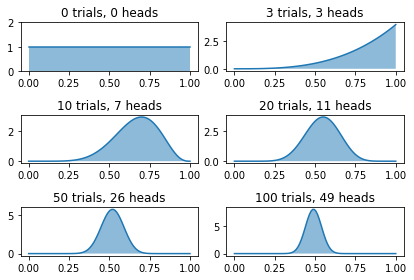

In [3]:
num_of_trials = [0, 3, 10, 20, 50,100]
data = stats.bernoulli.rvs(0.5, size = 100)
x = np.linspace(0,1, 100)

for i,N in enumerate(num_of_trials):
    heads = data[:N].sum()
    
    ax = plt.subplot(len(num_of_trials)/2, 2, i+1)
    ax.set_title('{} trials, {} heads'.format(N, heads))
    if i == 0:
        plt.ylim([0.0, 2.0])
    y = stats.beta.pdf(x, heads+1, 1+N - heads)
    plt.plot(x, y, label='{} tosses, {} heads'.format(N, heads))
    plt.fill_between(x, 0, y, alpha=0.5)
    
plt.tight_layout()

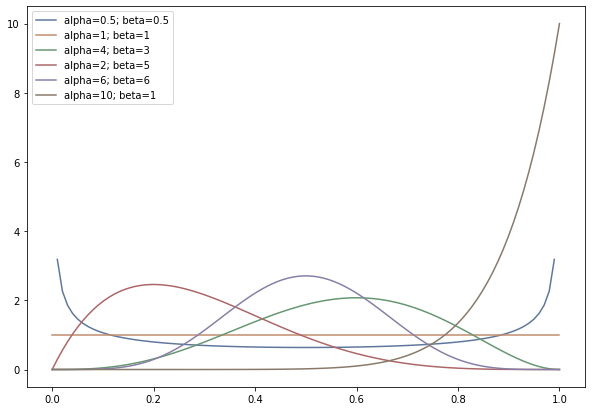

In [4]:
sns.set_palette("deep", desat=.6)
plt.figure(figsize=(10,7))
x = np.linspace(0,1,100)
params = [(0.5,0.5),(1,1), (4,3), (2,5), (6,6), (10,1)]

for p in params:
    y = stats.beta.pdf(x, p[0], p[1])
    plt.plot(x, y, label= 'alpha={}; beta={}'.format(p[0], p[1]))
plt.legend()

In [5]:
plt.style.use('ggplot')

In [6]:
n = 50
z = 10
alpha=12
beta=12
alpha_post = 22
beta_post =52

n_iter = 1000

In [7]:
basic_model = pymc3.Model()

with basic_model:
    theta = pymc3.Beta('theta',alpha=alpha, beta=beta)
    y = pymc3.Binomial('y', n=n, p=theta, observed=z)
    start = pymc3.find_MAP()
    step = pymc3.Metropolis()
    trace = pymc3.sample(n_iter, step, start, random_seed=1, progressbar=True)

C:\Users\Georgy\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -10.252, ||grad|| = 15: 100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 87.93it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 781.51draws/s]
The number of effective samples is smaller than 25% for some parameters.


C:\Users\Georgy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


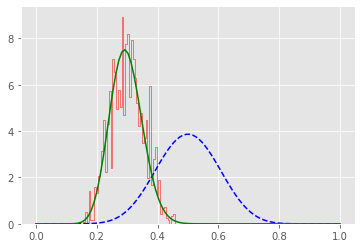

In [8]:
x = np.linspace(0,1,100)
plt.hist(trace['theta'], bins=50, histtype='step', normed=True, color='red')
plt.plot(x, stats.beta.pdf(x, alpha, beta), '--', color='blue')
plt.plot(x, stats.beta.pdf(x, alpha_post, beta_post), color='green')

In [38]:
pymc3.traceplot(trace)

AttributeError: Installed version of ArviZ requires PyMC3>=3.8. Please upgrade with `pip install pymc3>=3.8` or `conda install -c conda-forge pymc3>=3.8`.

In [47]:
x.ndim

1

In [44]:
beta0 = 1.0
beta1 = 3.0
x = np.random.normal(0,1,1000)
eps = np.random.normal(0,0.5,1000)

y = beta0 + beta1*x + eps

data = pd.DataFrame({'x':x, 'y':y})

In [48]:
data.head()

,x,y
0,0.965310,4.586797
1,-2.394137,-6.063263
2,-0.634602,-0.901431
3,-1.588506,-4.631699
4,-0.165249,0.159348


In [59]:
basic_model = pymc3.Model()
with basic_model:
    pymc3.glm.GLM.from_formula("y~x", data, family=pymc3.glm.families.Normal())
    
    step = pymc3.NUTS()
    trace = pymc3.sample(draws=2000,  step=step, random_seed=42, progressbar=True)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains:   0%|                                                                   | 0/5000 [00:00<?, ?draws/s]


RuntimeError: Chain 0 failed.

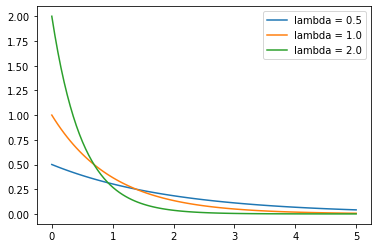

In [3]:
x = np.linspace(0.0, 5.0, 100)
lambdas = [0.5, 1.0, 2.0]
for lam in lambdas: 
    y = lam* np.exp(-lam*x)
    ax = plt.plot(x, y, label = "lambda = {}".format(lam))
    
plt.legend()

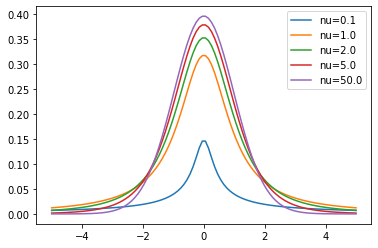

In [2]:
x = np.linspace(-5.0, 5.0, 100)
nus = [0.1,1.0, 2.0, 5.0, 50.0]
for nu in nus:
    y= stats.t.pdf(x, nu)
    ax = plt.plot(x, y, label = 'nu={}'.format(nu))
    
plt.legend()

In [200]:
def stock_info(ticker, start_date=None, end_date=None):
    stock = pdr.get_data_yahoo(ticker, start_date, end_date)
    stock['Returns'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    stock['Log_returns'] = np.log(stock['Returns'])
    plt.figure(figsize=(10,6))
    stock['Returns'].plot(linewidth=0.9)
    plt.ylabel("{} daily percentage returns".format(ticker))
    plt.show()
    
    return stock

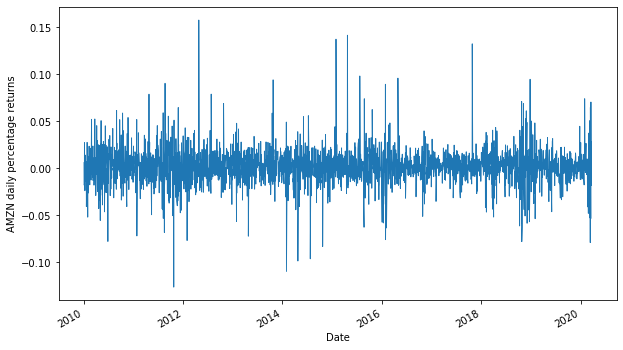

In [201]:
amzn = stock_info('AMZN', '2010', datetime.datetime.today())

In [12]:
np.arange(1,101).shape

(100,)

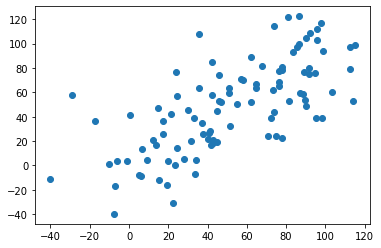

In [13]:
np.random.seed(1)
x = np.arange(1,101) + 20.0*np.random.randn(100)
np.random.seed(2)
y = np.arange(1,101) + 20.0*np.random.randn(100)
plt.scatter(x,y)

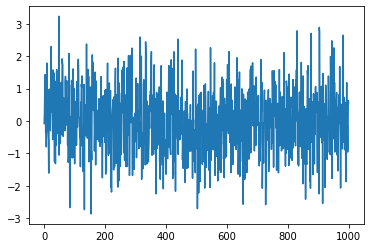

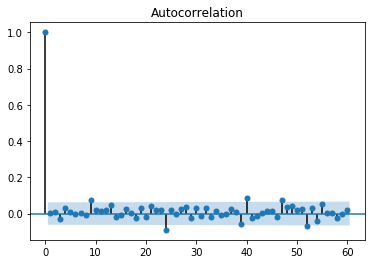

In [128]:
x = np.random.normal(0,1,1000)
plt.plot(np.arange(0,len(x)), x)
smt.graphics.plot_acf(x, lags=60)
plt.show()

In [120]:
np.random.seed(1)
x = w = np.random.randn(1000,3)
for s in range(3):
    for t in range(1,1000):
        x[t,s] = x[t-1,s] + w[t,s]



In [131]:
ts1 = x[:,0]

IndexError: too many indices for array

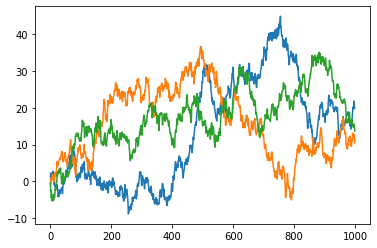

In [125]:
plt.plot(x[:,0])
plt.plot(x[:,1])
plt.plot(x[:,2])



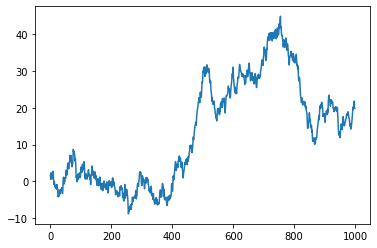

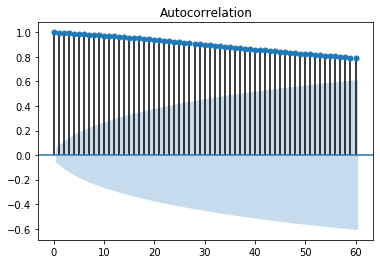

In [129]:
plt.plot(np.arange(0,len(ts1)), ts1)
smt.graphics.plot_acf(ts1, lags=60)
plt.show()

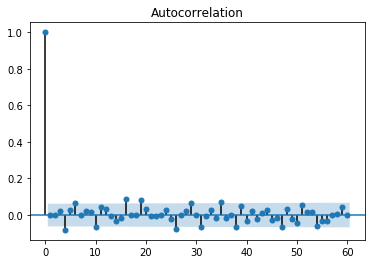

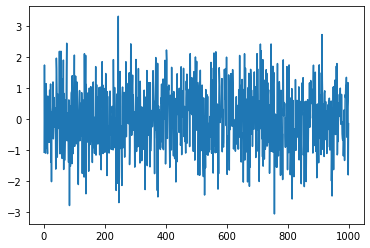

In [142]:
ts1 = pd.Series(ts1)
smt.graphics.plot_acf(ts1.diff().dropna(), lags=60)
plt.show()
ts1.diff().plot()


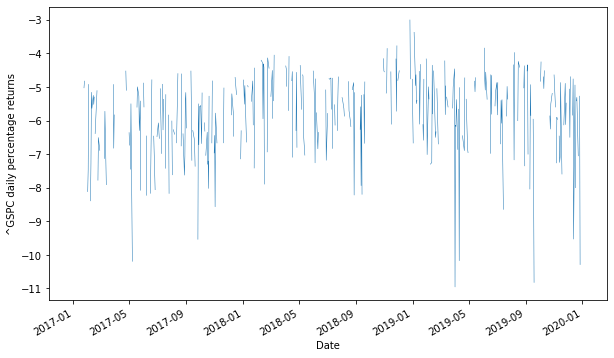

In [147]:
sp500 = stock_info('^GSPC', '2017', '2020')

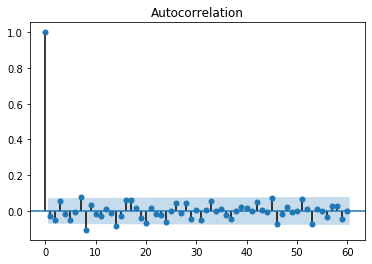

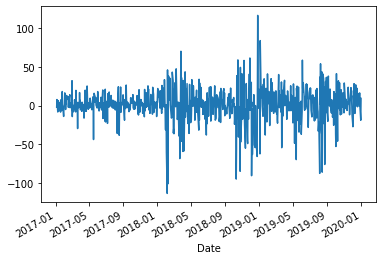

In [148]:
smt.graphics.plot_acf(sp500['Adj Close'].diff().dropna(), lags=60)
plt.show()
sp500['Adj Close'].diff().dropna().plot()

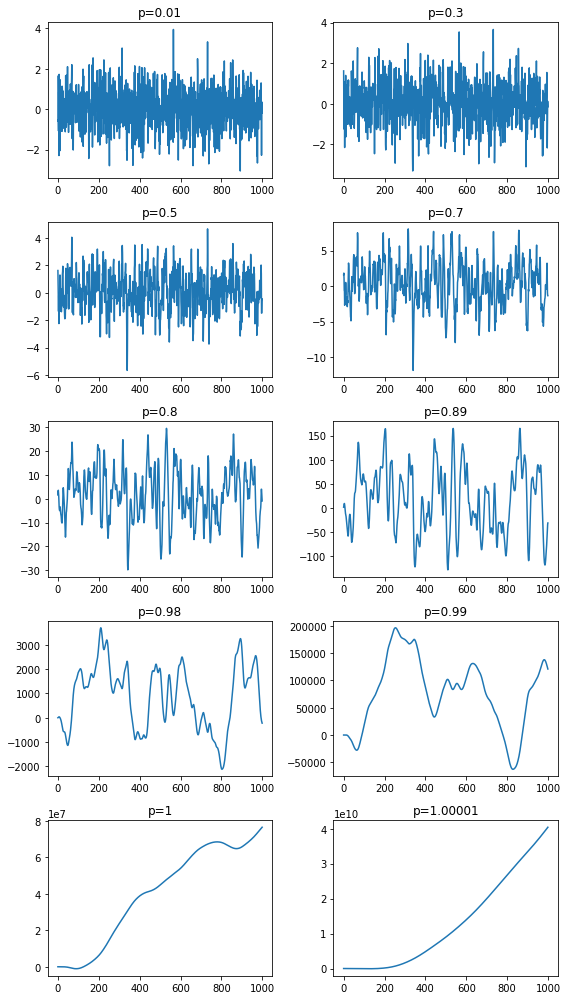

In [178]:
#AR(p)
np.random.seed(1)
x = w = np.random.randn(1000)
plt.figure(figsize=(8,14))
for idx, p in enumerate([0.01, 0.3,0.5, 0.7, 0.8,0.89,0.98,0.99,1,1.00001]):
    for t in range(1,1000):
                x[t] = p*x[t-1] + w[t]

    if idx==0:
        plt.ylim([-5,5])
    ax = plt.subplot(5,2,idx+1)
    ax.set_title('p={}'.format(p))
    plt.plot(x)
plt.tight_layout()

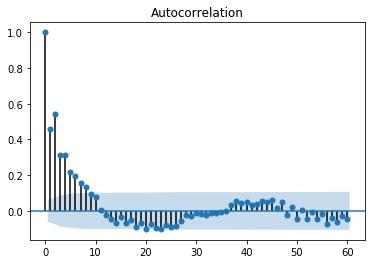

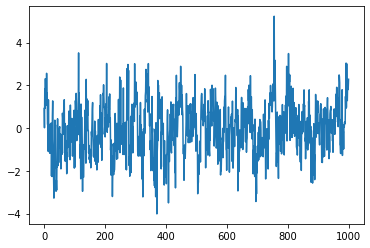

In [185]:
x = w = np.random.randn(1000)
for t in range(2,1000):
    x[t] = 0.3*x[t-1] + 0.4*x[t-2] + w[t]

smt.graphics.plot_acf(pd.Series(x).dropna(), lags=60)
plt.show()
plt.plot(x)


In [187]:
ar2 = smt.ARMA(x, (2,0)).fit(method='mle')

In [189]:
print(ar2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1418.840
Method:                           mle   S.D. of innovations              1.000
Date:                Sat, 21 Mar 2020   AIC                           2845.681
Time:                        17:15:43   BIC                           2865.312
Sample:                             0   HQIC                          2853.142
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0215      0.102     -0.212      0.833      -0.221       0.178
ar.L1.y        0.2659      0.029      9.285      0.000       0.210       0.322
ar.L2.y        0.4243      0.029     14.803      0.0

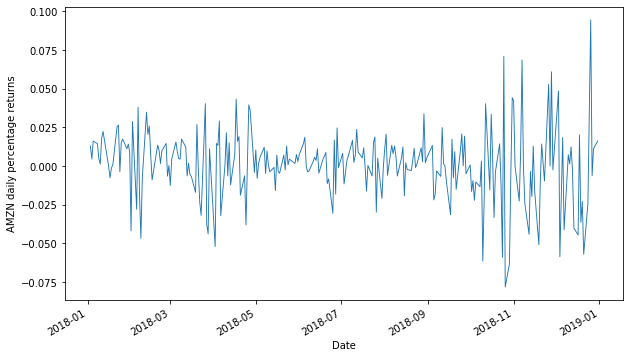

In [202]:
amzn = stock_info('AMZN', '2018', '2019')

C:\Users\Georgy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  if date_index and not is_monotonic:


                              ARMA Model Results                              
Dep. Variable:                Returns   No. Observations:                  250
Model:                     ARMA(2, 0)   Log Likelihood                 591.625
Method:                           mle   S.D. of innovations              0.023
Date:                Sat, 21 Mar 2020   AIC                          -1175.250
Time:                        17:27:28   BIC                          -1161.164
Sample:                             0   HQIC                         -1169.581
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.001      0.872      0.384      -0.001       0.004
ar.L1.Returns    -0.0452      0.063     -0.715      0.475      -0.169       0.079
ar.L2.Returns    -0.0090      0.063     

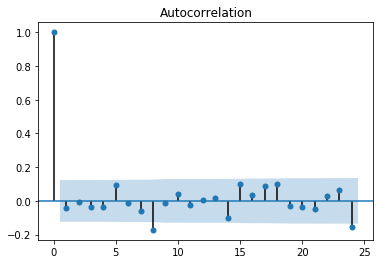

In [205]:
smt.graphics.plot_acf(amzn['Returns'].dropna())
amzn_m = smt.ARMA(amzn['Returns'].dropna(), order=(2,0)).fit(method='mle')
print(amzn_m.summary())

In [207]:
amzn_m.predict(amzn.shape[0],amzn.shape[0]+2)

C:\Users\Georgy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  prediction_index = self.data.row_labels[start:end + 1]


250    0.000418
251    0.001087
252    0.001199
dtype: float64